In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import numpy as np
import seaborn as sn


In [2]:
# Load data from NPZ file in your local library
data = np.load('/Users/neevgrover/Documents/Python Programs/Digit Recognition/Data.npz')

# Access the variables stored in the NPZ file
X_train = data['x_train']
y_train = data['y_train']
X_test = data['x_test']
y_test = data['y_test']

# Optionally, you can check the keys of the loaded data
print("Keys in the NPZ file:", data.files)

# Close the NPZ file
data.close()

Keys in the NPZ file: ['x_test', 'x_train', 'y_train', 'y_test']


In [3]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


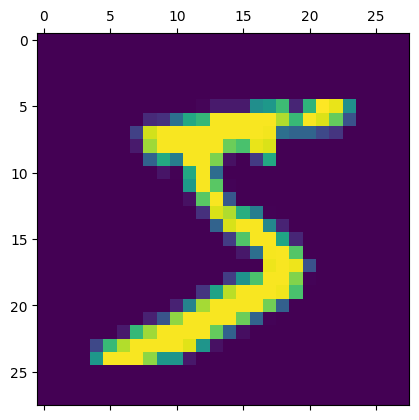

In [4]:
plt.matshow(X_train[0])

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [7]:
X_train_flattened.shape

(60000, 784)

In [8]:
X_test_flattened.shape

(10000, 784)

In [9]:
len(X_train)

60000

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Model without any hidden layers
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 435us/step - loss: 0.4714 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 1s 417us/step - loss: 0.3042 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 1s 435us/step - loss: 0.2837 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 1s 445us/step - loss: 0.2733 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 1s 415us/step - loss: 0.2672 - accuracy: 0.9251


In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 370us/step - loss: 0.2693 - accuracy: 0.9256


[0.26932215690612793, 0.925599992275238]

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 288us/step


array([1.94092561e-02, 2.58310166e-07, 9.23497900e-02, 9.46849823e-01,
       2.90228706e-03, 1.31915152e-01, 1.28347017e-06, 9.99789536e-01,
       1.10205874e-01, 6.53903723e-01], dtype=float32)

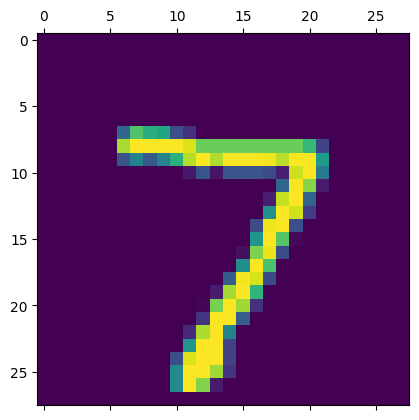

In [13]:
plt.matshow(X_test[0])

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    3,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1105,    5,    2,    1,    2,    4,    2,   14,    0],
       [   4,    5,  945,    9,    8,    3,   11,    9,   35,    3],
       [   2,    0,   32,  891,    1,   41,    2,   10,   24,    7],
       [   1,    1,   10,    0,  922,    0,    9,    4,    9,   26],
       [   8,    2,    5,   15,    9,  796,   13,    7,   30,    7],
       [  10,    3,    9,    1,    7,   14,  909,    2,    3,    0],
       [   1,    5,   28,    5,    8,    1,    0,  944,    3,   33],
       [   6,    4,    8,   16,    9,   28,    8,   12,  879,    4],
       [   9,    5,    2,    8,   37,    8,    0,   25,   11,  904]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

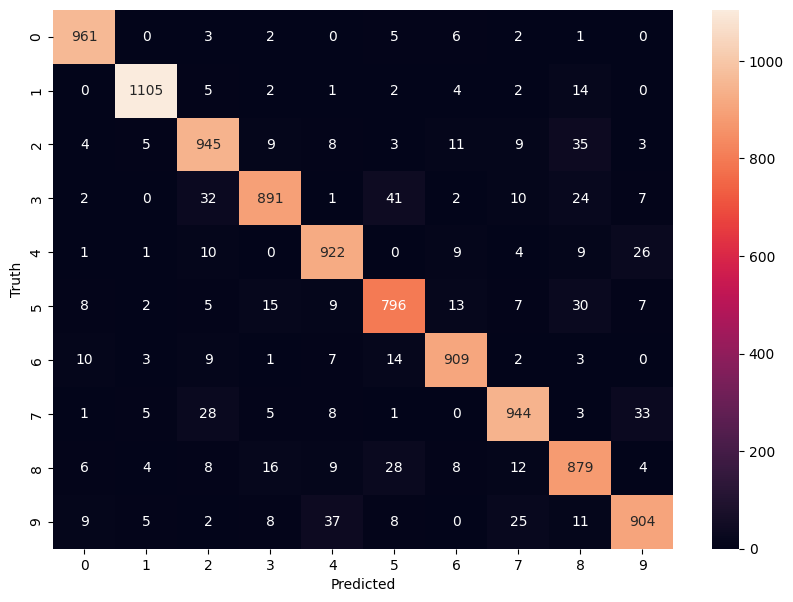

In [16]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 674us/step - loss: 0.2774 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 1s 727us/step - loss: 0.1278 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 1s 691us/step - loss: 0.0893 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 1s 621us/step - loss: 0.0676 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 1s 656us/step - loss: 0.0526 - accuracy: 0.9840


In [18]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 459us/step - loss: 0.0759 - accuracy: 0.9771


[0.07590983808040619, 0.9771000146865845]

313/313 [==============================] - 0s 390us/step


Text(95.72222222222221, 0.5, 'Truth')

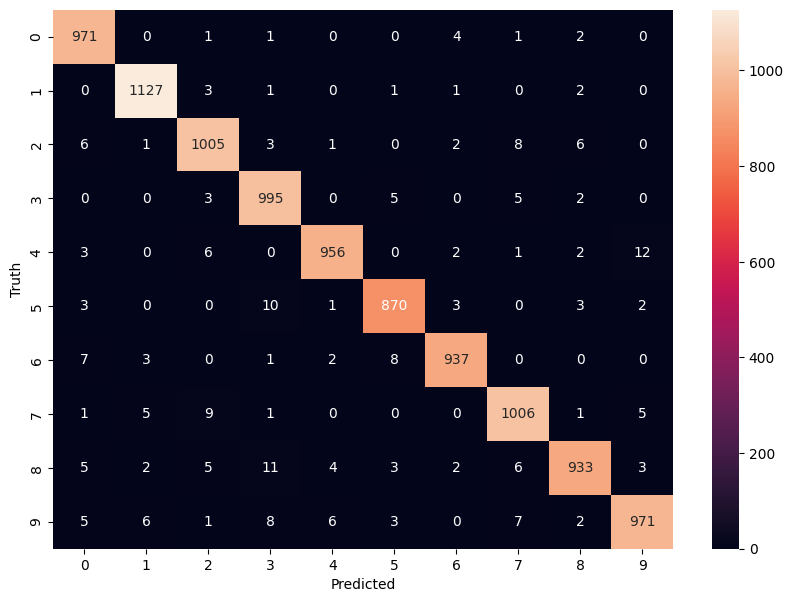

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 674us/step - loss: 0.2722 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 1s 615us/step - loss: 0.1254 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 1s 597us/step - loss: 0.0865 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 1s 651us/step - loss: 0.0638 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 1s 658us/step - loss: 0.0510 - accuracy: 0.9844


In [21]:
model.save("/Users/neevgrover/Documents/Python Programs/Digit Recognition/model.h5")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 431us/step - loss: 0.0844 - accuracy: 0.9765


[0.08441600948572159, 0.9764999747276306]

In [23]:
#Barrier between the two codes

In [24]:
image_path = "/Users/neevgrover/Documents/Python Programs/Digit Recognition/resized_pic.jpg"
image = cv2.imread(image_path)

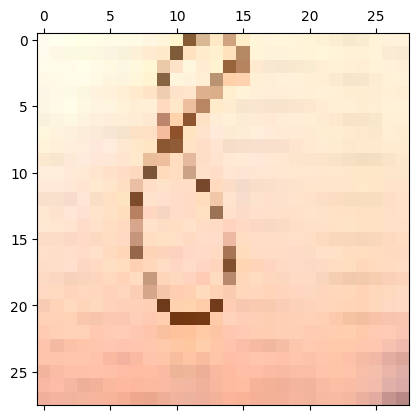

In [25]:
plt.matshow(image)

In [26]:
#Capture the Image
"""
#Take picture

import cv2
import numpy

def capture_and_save_image():
    # Open the webcam (usually the default webcam is indexed as 0)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Unable to open webcam")
        return

    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("Error: Unable to capture frame")
        return

    # Save the captured frame as an image file
    cv2.imwrite('captured_image.jpg', frame)
    print("Image saved as 'captured_image.jpg'")

    # Release the webcam
    cap.release()

if __name__ == "__main__":
    capture_and_save_image()
"""

'\n#Take picture\n\nimport cv2\nimport numpy\n\ndef capture_and_save_image():\n    # Open the webcam (usually the default webcam is indexed as 0)\n    cap = cv2.VideoCapture(0)\n\n    if not cap.isOpened():\n        print("Error: Unable to open webcam")\n        return\n\n    # Capture frame-by-frame\n    ret, frame = cap.read()\n\n    if not ret:\n        print("Error: Unable to capture frame")\n        return\n\n    # Save the captured frame as an image file\n    cv2.imwrite(\'captured_image.jpg\', frame)\n    print("Image saved as \'captured_image.jpg\'")\n\n    # Release the webcam\n    cap.release()\n\nif __name__ == "__main__":\n    capture_and_save_image()\n'

In [27]:
#Resize the image
"""

import cv2
import numpy


def resize_image(image_path):
    # Load the image from disk
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image")
        return None
    
    # Resize the image to 28x28 pixels
    resized_image = cv2.resize(image, (28, 28))
    
    return resized_image

if __name__ == "__main__":
    # Path to the image you want to resize
    image_path = "/Users/neevgrover/Documents/Python Programs/Digit Recognition/8_large.jpg"
    
    # Resize the image
    resized_image = resize_image(image_path)
    if resized_image is not None:
        # Save the resized image to disk
        cv2.imwrite('/Users/neevgrover/Documents/Python Programs/Digit Recognition/resized_pic.jpg', resized_image)
        print("Resized image saved as 'resized_pic.jpg'")
"""

'\n\nimport cv2\nimport numpy\n\n\ndef resize_image(image_path):\n    # Load the image from disk\n    image = cv2.imread(image_path)\n    if image is None:\n        print("Error: Unable to load image")\n        return None\n    \n    # Resize the image to 28x28 pixels\n    resized_image = cv2.resize(image, (28, 28))\n    \n    return resized_image\n\nif __name__ == "__main__":\n    # Path to the image you want to resize\n    image_path = "/Users/neevgrover/Documents/Python Programs/Digit Recognition/8_large.jpg"\n    \n    # Resize the image\n    resized_image = resize_image(image_path)\n    if resized_image is not None:\n        # Save the resized image to disk\n        cv2.imwrite(\'/Users/neevgrover/Documents/Python Programs/Digit Recognition/resized_pic.jpg\', resized_image)\n        print("Resized image saved as \'resized_pic.jpg\'")\n'